In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!pip install transformers

     |████████████████████████████████| 1.8MB 7.9MB/s 
     |████████████████████████████████| 890kB 49.0MB/s 
     |████████████████████████████████| 3.2MB 54.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=f3c3ef1bd7b5e4eefc60a10302cf8ffc1353e1650476e99281386e8cc8edfca5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
final_data = pd.read_csv("train_skill_name_difficulty.csv")
final_data

,board_syllabus,question_answer,skill_label,difficulty_label
0,"Raj English>>XII>>Biology>>Domestication, Cult...","Among the following, freshwater fish is rohu ...",3,0
1,Maharashtra New>>VI>>General Science>>Sound>>P...,Which of the following statement is true? Sou...,3,2
2,ICSE OLD>>XI>>Computer Science>>Functions>>Con...,The process of using multiple constructors wi...,3,0
3,CBSE>>VI>>Science>>Separation of Substances>>S...,Sieving is based on the difference in the siz...,3,1
4,AP>>X>>Biology>>Excretion - The Wastage Dispos...,The removal of toxic and unwanted waste subst...,3,1
...,...,...,...,...
39124,CAPS(South Africa)>>Grade 7>>Natural Sciences>...,How heat loss problems are prevented by birds...,2,1
39125,CBSE>>X>>Science>>Metals and Non-Metal,Give reasons why copper is used to make hot w...,3,2
39126,CBSE>>VII>>Science>>Motion and Time,The horizontal line in the graph is denoted as...,2,1
39127,Tamil Nadu>>VI>>Science>>Term 1>>Physics>>Forc...,SI unit of force is newton The SI unit of for...,3,2


In [ ]:
final_data["question_answer"].values

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [ ]:
final_data['skill_label'].value_counts()

3    11376
4    10707
2     8619
1     4997
0     3430
Name: skill_label, dtype: int64

In [ ]:


!cp "/content/drive/My Drive/research_skill_name_prediction/label_encoder_skill_lstm"  /content

In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

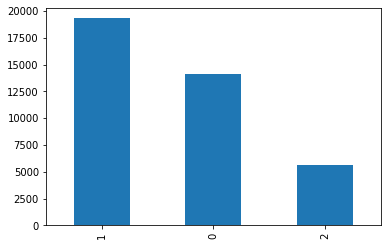

In [ ]:
final_data['difficulty_label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
val = pd.read_csv("val_skill_name_difficulty.csv")

In [ ]:
val

,board_syllabus,question_answer,skill_label,difficulty_label
0,AP>>VII>>Science>>Animal Fibre>>Silk,Name the two types of protein from which silk...,3,0
1,Maharashtra New>>VIII>>General Science>>Man Ma...,Give reasons: (i) Thermocol is used for the p...,4,2
2,CBSE>>VI>>Science>>Fun with Magnets>>Demagneti...,Identify the odd option. Rubbing a magnetic m...,4,2
3,Tamil Nadu>>VIII>>Science>>Term 1>>Physics>>Li...,Find the speed of light in glass of refractiv...,1,0
4,Raj English>>XII>>Biology>>Integumentary Syste...,Which of the following function is associated...,2,0
...,...,...,...,...
2055,CBSE>>XI>>Chemistry>>Chemistry : Part I>>Equil...,The solubility of A 2 X 3 is y mol.dm -3 . So...,1,0
2056,CBSE>>VI>>Computer Science>>Using Mail Merge>>...,"To create an invitation letter, click on Mail...",1,1
2057,CBSE>>XII>>Physics>>Physics : Part - II>>Ray O...,Choose the correct option about the intensity...,0,0
2058,ICSE OLD>>VII>>Biology>>Organ System of Human ...,Which of the following instrument is used to ...,4,1


In [ ]:
test = pd.read_csv("test_skill_name_difficulty.csv")
test

,board_syllabus,question_answer,skill_label,difficulty_label
0,CBSE>>Nursery>>Environmental Science>>Common V...,Write down the names of some common vegetable...,3,2
1,CBSE>>XII>>Physics>>Physics : Part - II>>Atoms,Name the series of hydrogen atom which lies i...,1,1
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1
4,Tamil Nadu>>IX>>Science>>Physics>>Measurement>...,The mass of an object is measured in kilogram...,3,1
...,...,...,...,...
4572,ICSE OLD>>VIII>>Biology>>Nervous System And Se...,Which of the following is the first cranial n...,3,1
4573,CBSE>>VII>>Computer Science>>Advance features ...,To ungroup the worksheets: Right-click on any...,2,0
4574,CBSE>>VIII>>Science>>Chemical Effects of Elect...,After passing electricity through a solution ...,0,2
4575,CLSP>>Stage 9>>Science>>Chemistry>>Material pr...,Identify the scientists who gave the “plum-pu...,3,0


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:

def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE = joblib.load('label_encoder_skill_lstm')

get_labels(0)

'Analysing'

In [ ]:
final_data

,board_syllabus,question_answer,skill_label,difficulty_label
0,"Raj English>>XII>>Biology>>Domestication, Cult...","Among the following, freshwater fish is rohu ...",3,0
1,Maharashtra New>>VI>>General Science>>Sound>>P...,Which of the following statement is true? Sou...,3,2
2,ICSE OLD>>XI>>Computer Science>>Functions>>Con...,The process of using multiple constructors wi...,3,0
3,CBSE>>VI>>Science>>Separation of Substances>>S...,Sieving is based on the difference in the siz...,3,1
4,AP>>X>>Biology>>Excretion - The Wastage Dispos...,The removal of toxic and unwanted waste subst...,3,1
...,...,...,...,...
39124,CAPS(South Africa)>>Grade 7>>Natural Sciences>...,How heat loss problems are prevented by birds...,2,1
39125,CBSE>>X>>Science>>Metals and Non-Metal,Give reasons why copper is used to make hot w...,3,2
39126,CBSE>>VII>>Science>>Motion and Time,The horizontal line in the graph is denoted as...,2,1
39127,Tamil Nadu>>VI>>Science>>Term 1>>Physics>>Forc...,SI unit of force is newton The SI unit of for...,3,2


In [ ]:
new_data = final_data

In [ ]:
question_answer = new_data["question_answer"].values
categories = new_data["skill_label"].values

In [ ]:
question_answer

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [ ]:
question_answer[0]

' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.'

In [ ]:
len(categories)

39129

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.
Token IDs: tensor([  101,  2426,  1996,  2206,  1010, 12573,  3869,  2003, 20996,  6979,
        20996,  6979,  2003,  1037,  4840,  2300,  3869,  1012,  2060,  2691,
        12573,  3869,  2024,  4937,  2721,  1010,  2691, 29267,  1012,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
print('Original: ', len(question_answer[1]))
print('Token IDs:', len(input_ids[1]))

Original:  171
Token IDs: 128


In [ ]:
val_text = val["question_answer"].values
val_labels = val["skill_label"].values
test_text = test["question_answer"].values
test_labels = test["skill_label"].values

In [ ]:
test_labels

array([3, 1, 0, ..., 0, 3, 2])

In [ ]:
val_labels

array([3, 4, 4, ..., 0, 4, 4])

In [ ]:
val_input_ids = []
val_attention_masks = []

for sent in val_text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    val_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    val_attention_masks.append(encoded_dict['attention_mask'])
# Convert the lists into tensors.
val_input_ids = torch.cat(val_input_ids, dim=0)
val_attention_masks = torch.cat(val_attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', val_text[0])
print('Token IDs:', val_attention_masks[0])

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   Name the two types of protein from which silk is made. Sericin and fibroin 
Token IDs: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
print('Original: ', val_text[1])
print('Token IDs:', val_input_ids[1])

Original:   Give reasons: (i) Thermocol is used for the packing of delicate items. (ii) Name two diseases that may develop in people working in thermocol industries. (i) Thermocol is a good shock-absorber, therefore, it is used for packing of delicate items. (ii) People working in thermocol industries may suffer from blood cancer such as leukemia and lymphoma or have problems in eyes and respiratory system. 
Token IDs: tensor([  101,  2507,  4436,  1024,  1006,  1045,  1007,  1996, 10867, 24163,
         2140,  2003,  2109,  2005,  1996, 14743,  1997, 10059,  5167,  1012,
         1006,  2462,  1007,  2171,  2048,  7870,  2008,  2089,  4503,  1999,
         2111,  2551,  1999,  1996, 10867, 24163,  2140,  6088,  1012,  1006,
         1045,  1007,  1996, 10867, 24163,  2140,  2003,  1037,  2204,  5213,
         1011, 16888,  2121,  1010,  3568,  1010,  2009,  2003,  2109,  2005,
        14743,  1997, 10059,  5167,  1012,  1006,  2462,  1007,  2111,  2551,
         1999,  1996, 10867, 24

In [ ]:
labels = torch.tensor(categories)
val_labels = torch.tensor(val_labels)

In [ ]:
val_labels

tensor([3, 4, 4,  ..., 0, 4, 4])

In [ ]:
get_labels(1)

'Applying'

In [ ]:
len(set(final_data["question_answer"].values).intersection(val["question_answer"].values))

0

In [ ]:
num_classes = len(list(set(categories)))
list(set(categories))

[0, 1, 2, 3, 4]

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks,val_labels) 
# Create a 90-10train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.90 * len(dataset))
# val_size = len(dataset) - train_size

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# # print('{:>5,} validation samples'.format(val_size))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            dataset,  # The training samples.
            sampler = RandomSampler(dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertModel, AdamW, BertConfig

# # Loads BertForSequenceClassification, the pretrained BERT model with a single 
# model = BertModel.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
# )

# # Tell pytorch to run this model on the GPU.
# model.cuda()

In [ ]:




set(test["question_answer"].values).intersection(set(final_data["question_answer"].values))

set()

In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_prediction.zip"
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_prediction.zip"

Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_prediction.zip
   creating: model_bert_skill_prediction/
  inflating: model_bert_skill_prediction/tokenizer_config.json  
  inflating: model_bert_skill_prediction/model_weights  
  inflating: model_bert_skill_prediction/vocab.txt  
  inflating: model_bert_skill_prediction/special_tokens_map.json  
Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_prediction.zip
   creating: model_bert_difficulty_prediction/
  inflating: model_bert_difficulty_prediction/tokenizer_config.json  
  inflating: model_bert_difficulty_prediction/model_weights  
  inflating: model_bert_difficulty_prediction/vocab.txt  
  inflating: model_bert_difficulty_prediction/special_tokens_map.json  


In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_prediction.zip"

Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_bert_multi_task_prediction.zip
   creating: model_bert_multi_task_prediction/
  inflating: model_bert_multi_task_prediction/model_weights  
  inflating: model_bert_multi_task_prediction/tokenizer_config.json  
  inflating: model_bert_multi_task_prediction/special_tokens_map.json  
  inflating: model_bert_multi_task_prediction/vocab.txt  


In [ ]:
!pip install torchtext
import torchtext

In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_cascade.zip"
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_save_BLOOM_difficulty_Lstm.zip"
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_save_gru_difficulty_name.zip"

Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_bert_skill_cascade.zip
   creating: model_bert_skill_cascade/
  inflating: model_bert_skill_cascade/model_weights  
  inflating: model_bert_skill_cascade/tokenizer_config.json  
  inflating: model_bert_skill_cascade/special_tokens_map.json  
  inflating: model_bert_skill_cascade/vocab.txt  
Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_save_BLOOM_difficulty_Lstm.zip
   creating: model_save_BLOOM_difficulty_Lstm/
  inflating: model_save_BLOOM_difficulty_Lstm/model_weights  
Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_save_gru_difficulty_name.zip
   creating: model_save_gru_difficulty_name/
  inflating: model_save_gru_difficulty_name/model_weights  


In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_save_gru_skill_name.zip"

Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_save_gru_skill_name.zip
   creating: model_save_gru_skill_name/
  inflating: model_save_gru_skill_name/model_weights  


In [ ]:
!unzip "/content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_cascade.zip"


Archive:  /content/drive/MyDrive/research_skill_name_prediction/model_bert_difficulty_cascade.zip
   creating: model_bert_difficulty_cascade/
  inflating: model_bert_difficulty_cascade/model_weights  
  inflating: model_bert_difficulty_cascade/special_tokens_map.json  
  inflating: model_bert_difficulty_cascade/tokenizer_config.json  
  inflating: model_bert_difficulty_cascade/vocab.txt  


In [ ]:

text = torchtext.data.Field(lower=True, batch_first=True, tokenize='spacy', include_lengths=True)
target = torchtext.data.Field(sequential=False, use_vocab=False, is_target=True)
# use field objects to read training, validation and test sets
train = torchtext.data.TabularDataset(path='train_skill_name_difficulty.csv', format='csv',
                                      fields={'question_answer': ('text',text),
                                              'difficulty_label': ('target',target)})
val = torchtext.data.TabularDataset(path='val_skill_name_difficulty.csv', format='csv',
                                    fields={'question_answer': ('text',text),
                                              'difficulty_label': ('target',target)})
test_text = torchtext.data.TabularDataset(path='test_skill_name_difficulty.csv', format='csv',
                                     fields={'difficulty_label': ('label', target),
                                             'question_answer': ('text',text)})

In [ ]:
batch_size = 32
train_iter = torchtext.data.BucketIterator(dataset=train,
                                           batch_size=batch_size,
                                           sort_key=lambda x: x.text.__len__(),
                                           shuffle=True,
                                           sort_within_batch=True) 
val_iter = torchtext.data.BucketIterator(dataset=val,
                                         batch_size=batch_size,
                                         sort_key=lambda x: x.text.__len__(),
                                         train=False,
                                         sort_within_batch=True)
test_iter = torchtext.data.BucketIterator(dataset=test_text,
                                          batch_size=batch_size,
                                          sort=False,
                                          sort_within_batch=False)

In [ ]:
import torchtext.vocab as vocab


In [ ]:
text.build_vocab(train, val, test_text,vectors="glove.6B.100d", min_freq=3)


.vector_cache/glove.6B.zip: 862MB [06:51, 2.10MB/s]                           
100%|█████████▉| 398329/400000 [00:16<00:00, 25548.29it/s]

In [ ]:
print(text.vocab.vectors.shape)
print(f"Unique tokens in text vocabulary: {len(text.vocab)}")

torch.Size([17896, 100])
Unique tokens in text vocabulary: 17896


In [ ]:
num_classes

5

In [ ]:
# attention layer code inspired from: https://discuss.pytorch.org/t/self-attention-on-words-and-masking/5671/4
from torch import nn
class Attention(nn.Module):
    def __init__(self, hidden_size, batch_first=False):
        super(Attention, self).__init__()

        self.hidden_size = hidden_size
        self.batch_first = batch_first

        self.att_weights = nn.Parameter(torch.Tensor(1, hidden_size), requires_grad=True)

        stdv = 1.0 / np.sqrt(self.hidden_size)
        for weight in self.att_weights:
            nn.init.uniform_(weight, -stdv, stdv)

    def get_mask(self):
        pass

    def forward(self, inputs, lengths):
        if self.batch_first:
            batch_size, max_len = inputs.size()[:2]
        else:
            max_len, batch_size = inputs.size()[:2]
            
        # apply attention layer
        weights = torch.bmm(inputs,
                            self.att_weights
                            .permute(1, 0)  
                            .unsqueeze(0)  
                            .repeat(batch_size, 1, 1) 
                            )
    
        attentions = torch.softmax(F.relu(weights.squeeze()), dim=-1)

        mask = torch.ones(attentions.size(), requires_grad=True).cuda()
        for i, l in enumerate(lengths):  # skip the first sentence
            if l < max_len:
                mask[i, l:] = 0

        masked = attentions * mask
        _sums = masked.sum(-1).unsqueeze(-1)  # sums per row
        
        attentions = masked.div(_sums)

        weighted = torch.mul(inputs, attentions.unsqueeze(-1).expand_as(inputs))

        representations = weighted.sum(1).squeeze()

        return representations, attentions

In [ ]:
from torch import nn
class MultiClassClassifierGRU(nn.Module):
  def __init__(self, pretrained_lm, hidden_dim=228, lstm_layer=2, dropout=0.2):
        super(MultiClassClassifierGRU, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.embedding = nn.Embedding.from_pretrained(pretrained_lm)
        self.embedding.weight.requires_grad = False
        self.gru1 = nn.GRU(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten1 = Attention(hidden_dim*2, batch_first=True) # 2 is bidrectional
        self.gru2 = nn.GRU(input_size=hidden_dim*2,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten2 = Attention(hidden_dim*2, batch_first=True)
        self.fc1 = nn.Sequential(nn.Linear(hidden_dim*7*2, hidden_dim*7*2),
                                 nn.BatchNorm1d(hidden_dim*7*2),
                                 nn.ReLU()) 
        self.fc2 = nn.Linear(hidden_dim*7*2, num_classes)

    
  def forward(self, x, x_len):
        x = self.embedding(x)
        x = self.dropout(x)
        
        x = nn.utils.rnn.pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False)
        out1, h_n = self.gru1(x)

        x, lengths = nn.utils.rnn.pad_packed_sequence(out1, batch_first=True)
        lengths_tensor = torch.autograd.Variable(torch.FloatTensor(lengths.float())).view(-1,1)

        average_pooling = torch.sum(x,dim=1)/lengths_tensor.to(device)
        max_pooling =  torch.nn.functional.adaptive_max_pool1d(x.permute(0,2,1), (1,)).view(x.size()[0],-1)

        # print(pooled_output_1.size())

        x, _ = self.atten1(x, lengths) # skip connect
        if len(x.shape)==1:
          x = x.reshape(1,-1)
        pooled_output_1 = torch.cat([x,h_n[-1],average_pooling,max_pooling],dim=1)


        # print(pooled_output_1.size())

        out2, h_n = self.gru2(out1)
        y, lengths = nn.utils.rnn.pad_packed_sequence(out2, batch_first=True)

        lengths_tensor = torch.autograd.Variable(torch.FloatTensor(lengths.float())).view(-1,1)

        average_pooling = torch.sum(y,dim=1)/lengths_tensor.to(device)
        max_pooling =  torch.nn.functional.adaptive_max_pool1d(y.permute(0,2,1), (1,)).view(y.size()[0],-1)
        y, _ = self.atten2(y, lengths)
        if len(y.shape)==1:
          y = y.reshape(1,-1)
        pooled_output_2 = torch.cat([y,h_n[-1],average_pooling,max_pooling],dim=1)

        z = torch.cat([pooled_output_1, pooled_output_2], dim=1)

        z = self.fc1(self.dropout(z))
        z = self.fc2(self.dropout(z))
        return z


In [ ]:
import numpy as np
model_gru = MultiClassClassifierGRU(text.vocab.vectors, hidden_dim=400, lstm_layer=2, dropout=0.3).cuda()
model_gru.load_state_dict(torch.load("model_save_gru_skill_name/model_weights"))

100%|█████████▉| 398329/400000 [00:29<00:00, 25548.29it/s]

<All keys matched successfully>

In [ ]:
from torch import nn
class MultiClassClassifierLstm(nn.Module):
  def __init__(self, pretrained_lm, hidden_dim=128, lstm_layer=2, dropout=0.2):
        super(MultiClassClassifierLstm, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.embedding = nn.Embedding.from_pretrained(pretrained_lm)
        self.embedding.weight.requires_grad = False
        self.lstm1 = nn.LSTM(input_size=self.embedding.embedding_dim,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten1 = Attention(hidden_dim*2, batch_first=True) # 2 is bidrectional
        self.lstm2 = nn.LSTM(input_size=hidden_dim*2,
                            hidden_size=hidden_dim,
                            num_layers=1, 
                            bidirectional=True)
        self.atten2 = Attention(hidden_dim*2, batch_first=True)
        self.fc1 = nn.Sequential(nn.Linear(hidden_dim*lstm_layer*2, hidden_dim*lstm_layer*2),
                                 nn.BatchNorm1d(hidden_dim*lstm_layer*2),
                                 nn.ReLU()) 
        self.fc2 = nn.Linear(hidden_dim*lstm_layer*2, 5)

    
  def forward(self, x, x_len):
        x = self.embedding(x)
        x = self.dropout(x)
        
        x = nn.utils.rnn.pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False)
        out1, (h_n, c_n) = self.lstm1(x)
        x, lengths = nn.utils.rnn.pad_packed_sequence(out1, batch_first=True)
        x, _ = self.atten1(x, lengths) # skip connect

        out2, (h_n, c_n) = self.lstm2(out1)
        y, lengths = nn.utils.rnn.pad_packed_sequence(out2, batch_first=True)
        y, _ = self.atten2(y, lengths)
        
        if len(x.shape)==1:
          x = x.reshape(1,-1)
          y = y.reshape(1,-1)

        z = torch.cat([x, y], dim=1)
        z = self.fc1(self.dropout(z))
        z = self.fc2(self.dropout(z))
        return z


In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_save_BLOOM_skill_Lstm" /content/

In [ ]:
model_lstm = MultiClassClassifierLstm(text.vocab.vectors, hidden_dim=128, lstm_layer=2, dropout=0.3).cuda()
model_lstm.load_state_dict(torch.load("model_save_BLOOM_skill_Lstm/model_weights"))

<All keys matched successfully>

In [ ]:
from torch import nn
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count, hidden_dim=768, mlp_dim=500, extras_dim=100, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim, mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # # nn.ReLU(),
            # # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        pooled_output = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output['pooler_output'])
        # concat_output = torch.cat((dropout_output, topic_emb), dim=1)
        # concat_output = self.dropout(concat_output)
        mlp_output = self.mlp(dropout_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Loads BertForSequenceClassification, the pretrained BERT model with a single 
model = MultiClassClassifier('bert-base-uncased',num_classes, 768,500,140,dropout=0.1,freeze_bert=False)

model.load_state_dict(torch.load("model_bert_skill_prediction/model_weights"))

# Tell pytorch to run this model on the GPU.
model.cuda()


MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
from torch import nn
class MultiClassClassifier(nn.Module):
    def __init__(self, bert_model_path, labels_count,skill_label_count, hidden_dim=768, mlp_dim=500, extras_dim=140, dropout=0.1, freeze_bert=False):
        super().__init__()

        self.bert = BertModel.from_pretrained(bert_model_path,output_hidden_states=False,output_attentions=False)
        self.dropout = nn.Dropout(dropout)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),
            # nn.Linear(mlp_dim, mlp_dim),
            # nn.ReLU(),            
            nn.Linear(mlp_dim, labels_count)
        )
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_dim , mlp_dim),
            nn.ReLU(),         
            nn.Linear(mlp_dim, skill_label_count)
        )
        # self.softmax = nn.LogSoftmax(dim=1)
        if freeze_bert:
            print("Freezing layers")
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, tokens, masks):
        pooled_output = self.bert(tokens, attention_mask=masks)
        dropout_output = self.dropout(pooled_output['pooler_output'])
        concat_output = dropout_output
        mlp_output = self.mlp(concat_output)
        skill_output = self.mlp2(concat_output)
        # proba = self.sigmoid(mlp_output)
        # proba = self.softmax(mlp_output)

        return mlp_output,skill_output

In [ ]:
num_classes

5

In [ ]:
model_multi_task = MultiClassClassifier('bert-base-uncased',3, 5,768,500,140,dropout=0.1,freeze_bert=False)
model_multi_task.load_state_dict(torch.load('model_bert_multi_task_prediction/model_weights'))
model_multi_task.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
model_cascade = MultiClassClassifier('bert-base-uncased',num_classes, 768,500,140,dropout=0.1,freeze_bert=False)

model_cascade.load_state_dict(torch.load("model_bert_skill_cascade/model_weights"))

<All keys matched successfully>

In [ ]:
model_cascade.cuda()

MultiClassClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
# for param in model.bert.encoder.layer[0:12].parameters():
#     param.requires_grad=False
# for param in model.bert.embeddings.parameters():
#     param.requires_grad=False


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:

from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

1223

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
test

,board_syllabus,question_answer,skill_label,difficulty_label
0,CBSE>>Nursery>>Environmental Science>>Common V...,Write down the names of some common vegetable...,3,2
1,CBSE>>XII>>Physics>>Physics : Part - II>>Atoms,Name the series of hydrogen atom which lies i...,1,1
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1
4,Tamil Nadu>>IX>>Science>>Physics>>Measurement>...,The mass of an object is measured in kilogram...,3,1
...,...,...,...,...
4572,ICSE OLD>>VIII>>Biology>>Nervous System And Se...,Which of the following is the first cranial n...,3,1
4573,CBSE>>VII>>Computer Science>>Advance features ...,To ungroup the worksheets: Right-click on any...,2,0
4574,CBSE>>VIII>>Science>>Chemical Effects of Elect...,After passing electricity through a solution ...,0,2
4575,CLSP>>Stage 9>>Science>>Chemistry>>Material pr...,Identify the scientists who gave the “plum-pu...,3,0


In [ ]:
test_features = test["question_answer"].values
test_labels = test["skill_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:




test_labels

array([3, 1, 0, ..., 0, 3, 2])

In [ ]:
test_features

array([' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot. ',
       ' Name the series of hydrogen atom which lies in the U.V region. Lyman series lies in the U.V region. ',
       ' Which of the following is not the element of an association? Relationships are abstract Each association has elements 1) a group of people, 2) voluntary Membership, 3) shared and common interests or needs as the basis, 4) some set of objective goals which are to be achieved collectively by all the members, 5) a voluntary organisation, and 6) co-operation among the members objectives pooled resources for funds needed for action.',
       ...,
       ' After passing electricity through a solution the change that takes place is a chemical change Physical changes are those changes that do not result in the production of a new substance whereas a chemical change involves the production of a new substance. For e

In [ ]:
test_features[0]

' Write down the names of some common vegetables. Answer may vary Probable answer – Names of some common vegetables are potato, onion, tomato and carrot. '

In [ ]:
input_ids = []
attention_masks = []
for sent in test_features:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
test_labels = torch.tensor(test_labels)
test_skill_labels = torch.tensor(test_skill_labels)

# Set the batch size.  
batch_size = 32  

# test_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# print(test_poincare_tensor.shape)
# difficulty_tensor = torch.tensor(difficulty_level_vectors,dtype=torch.float)
# print("difficulty_tensor",difficulty_tensor.shape)
# Combine the training inputs into a TensorDataset.
prediction_data = TensorDataset(input_ids, attention_masks, test_labels,test_skill_labels)
# Create the DataLoader.
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:


!pip install ax-platform==0.1.9

     |████████████████████████████████| 501kB 7.7MB/s 
     |████████████████████████████████| 225kB 15.0MB/s 
     |████████████████████████████████| 286kB 15.8MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.3.1-py2.py3-none-any.whl size=474648 sha256=8a6626dd15e1155c939af85d5f2d70ddccea485abebf1ffae1be55465d4aac06
  Stored in directory: /root/.cache/pip/wheels/74/8d/e0/a2fefbbe64dbbcbf79bccc3385baa67b693ae4f8bb86306214
Successfully built gpytorch


In [ ]:
from ax import optimize

In [ ]:
from sklearn.metrics import precision_recall_fscore_support


In [ ]:
def get_confusion_matrix(predicted,actual):
    conf_matrix = np.zeros((5, 5))
    for pred,act in zip(predicted,actual):
        conf_matrix[act,pred]+=1
    return conf_matrix
        
def get_TP(confusion_matrix,label):
    tp = confusion_matrix[label][label]
    return tp

def get_FN(confusion_matrix,label):
    row = confusion_matrix[label,]
    row_truepositives = row[label]
    fn = row.sum() - row_truepositives
    return fn

def get_FP(confusion_matrix,tag):
    col = confusion_matrix[:,tag]
    col_tp = col[tag]
    #  sum of all values in column except tp
    fp = col.sum() - col_tp
    return fp
def Precision(conf_matrix):
    precision = 0.0
    for label in [0,1,2,3,4]:
        dividor= get_TP(conf_matrix,label)+get_FP(conf_matrix,label)
        if dividor != 0.0:
            precision += (get_TP(conf_matrix,label))/dividor
    return (precision / 5)

def Recall(conf_matrix):
    recall = 0.0
    for label in [0,1,2,3,4]:
        dividor=get_TP(conf_matrix,label)+get_FN(conf_matrix,label)
        if dividor != 0.0:
            recall += (get_TP(conf_matrix,label))/dividor
    return (recall / 5)

def F1(precision,recall):
    return (2*precision*recall)/(precision+recall)
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
def print_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision(conf_matrix)
    recall = Recall(conf_matrix)
    f1_score = F1(precision,recall)
    return (precision,recall,f1_score)

In [ ]:

def Precision_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_precision = dict()
    for label in [0,1,2,3,4]:
        true_sample = [sample for sample in test_samples if sample==label ]
        if (get_TP(conf_matrix,label)+get_FP(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) *(get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label)))
            label_wise_precision[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FP(conf_matrix,label))

    
    precision =  accum/len(test_samples)
            
    return precision


def Recall_macro_weighted(conf_matrix,test_samples):
    accum =0
    label_wise_recall = dict()
    for label in [0,1,2,3,4]:
        true_sample = [sample for sample in test_samples if sample==label ]

        if (get_TP(conf_matrix,label)+get_FN(conf_matrix,label))!=0:
            accum+= float(len(true_sample)) * (get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label)))
            label_wise_recall[label] = get_TP(conf_matrix,label)/(get_TP(conf_matrix,label)+get_FN(conf_matrix,label))

    
    recall =  accum/len(test_samples)
    return recall
def print_weighted_metrics(predictions,test_labels):
    conf_matrix = get_confusion_matrix(predictions,test_labels)
    precision = Precision_macro_weighted(conf_matrix,test_labels)
    recall = Recall_macro_weighted(conf_matrix,test_labels)
    f1_score = F1(precision,recall)
    return (precision,recall,f1_score)

In [ ]:
def make_lstm_and_gru_predictions(index, params):
  model_lstm.eval()
  model_gru.eval()
  for i,batch in enumerate(test_iter):
    outputs = []
    if i == index:
      with torch.no_grad():
          question, x_len = batch.text
          x = question.cuda()
          # outs = sigmoid(outs.cpu().data.numpy()).tolist()
          y = batch.label.type(torch.long).cuda()
          if params['lstm']>=0.5:
            lstm_outputs = model_lstm(x,x_len)
            outputs.append(lstm_outputs)
          if params["gru"]>=0.5:
            gru_outputs = model_gru(x,x_len)
            outputs.append(gru_outputs)

    return outputs



In [ ]:
def make_predictions(params):
  # Prediction on test set
    print(params)
    print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

    # Put model in evaluation mode
    model.eval()
    model_multi_task.eval()
    model_cascade.eval()

    # Tracking variables 
    predictions , true_labels,ids = [], [], []


    # Predict 
    for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels, id = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          if params['multi_task']>=0.5:
            # print("multi")
            _,outputs = model_multi_task(b_input_ids,b_input_mask)
            final_outputs.append(outputs)
          if params['cascade']>=0.5:
            # print("cascade")
            output_cascade = model_cascade(b_input_ids,b_input_mask)
            final_outputs.append(output_cascade)
          if params['difficulty'] >=0:
            # print("normal")
            output_difficulty = model(b_input_ids,b_input_mask)
            final_outputs.append(output_difficulty)

          out = make_lstm_and_gru_predictions(index,params)
          if len(out)>0:
            final_outputs.append(out[0])
          if len(out) >1:
            final_outputs.append(out[1])
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_metrics(flat_predictions,flat_true_labels)
    print(accuracy_per_class(flat_predictions,flat_true_labels))
    print(metrics)
    print('    DONE.')
    return metrics[2]

In [ ]:
import torch.nn.functional as F
from ax.modelbridge.generation_strategy import GenerationStep, GenerationStrategy
from ax.modelbridge.registry import Models

best_parameters, best_values, experiment, model_100 = optimize(
        parameters=[
          {
            "name": "multi_task",
            "type": "range",
            "bounds": [1,2],
          },
          {
            "name": "cascade",
            "type": "range",
            "bounds": [0,1],
          },
               {
            "name": "lstm",
            "type": "range",
            "bounds": [0,1],
          },
          {
            "name": "gru",
            "type": "range",
            "bounds": [0,1],
          },
           {
            "name": "difficulty",
            "type": "range",
            "bounds": [0,1],
          },
        ],
        # Booth function
        evaluation_function=make_predictions,
        generation_strategy = GenerationStrategy(name="Sobol+GPEI", steps=[GenerationStep(model=Models.SOBOL, num_arms=10),
                GenerationStep(model=Models.GPEI, num_arms=12)]),
        minimize=False,
    )

[INFO 01-20 13:40:55] ax.service.managed_loop: Started full optimization with 20 steps.
[INFO 01-20 13:40:55] ax.service.managed_loop: Running optimization trial 1...


{'multi_task': 2, 'cascade': 0, 'lstm': 1, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 13:45:33] ax.service.managed_loop: Running optimization trial 2...


Class: Analysing
Accuracy: 109/404

Class: Applying
Accuracy: 185/602

Class: Knowledge & understanding
Accuracy: 634/933

Class: Remembering
Accuracy: 819/1356

Class: Understanding
Accuracy: 589/1282

None
(0.4941818825312142, 0.46401200634376333, 0.47862197718934923)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 1, 'gru': 0, 'difficulty': 1}
Predicting labels for 4,577 test sentences...


[INFO 01-20 13:52:28] ax.service.managed_loop: Running optimization trial 3...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 836/1356

Class: Understanding
Accuracy: 587/1282

None
(0.4989497174670675, 0.4638750973124732, 0.48077354299818803)
    DONE.
{'multi_task': 1, 'cascade': 0, 'lstm': 0, 'gru': 1, 'difficulty': 1}
Predicting labels for 4,577 test sentences...


[INFO 01-20 13:57:06] ax.service.managed_loop: Running optimization trial 4...


Class: Analysing
Accuracy: 109/404

Class: Applying
Accuracy: 185/602

Class: Knowledge & understanding
Accuracy: 634/933

Class: Remembering
Accuracy: 820/1356

Class: Understanding
Accuracy: 590/1282

None
(0.4944645160508415, 0.46431550520938164, 0.47891599008600194)
    DONE.
{'multi_task': 1, 'cascade': 1, 'lstm': 1, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:04:01] ax.service.managed_loop: Running optimization trial 5...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 836/1356

Class: Understanding
Accuracy: 587/1282

None
(0.49895235095650897, 0.4638750973124732, 0.48077476555192256)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 1, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:10:57] ax.service.managed_loop: Running optimization trial 6...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 195/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.498515232312102, 0.463534357783971, 0.4803888290877835)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:17:53] ax.service.managed_loop: Running optimization trial 7...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 1, 'cascade': 1, 'lstm': 1, 'gru': 0, 'difficulty': 1}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:24:49] ax.service.managed_loop: Running optimization trial 8...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 195/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 587/1282

None
(0.4987662606617568, 0.4636903640242206, 0.48058915703283195)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 1, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:31:47] ax.service.managed_loop: Running optimization trial 9...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 614/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.49896975789107056, 0.4640809459698324, 0.4808933866598818)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 1, 'gru': 1, 'difficulty': 1}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:38:45] ax.service.managed_loop: Running optimization trial 10...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 614/933

Class: Remembering
Accuracy: 836/1356

Class: Understanding
Accuracy: 585/1282

None
(0.4987260150560669, 0.4637774471042141, 0.48061723860821526)
    DONE.
{'multi_task': 1, 'cascade': 1, 'lstm': 1, 'gru': 1, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:45:42] ax.service.managed_loop: Running optimization trial 11...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 195/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 835/1356

Class: Understanding
Accuracy: 585/1282

None
(0.4976730334144321, 0.4630833662929839, 0.47975554198125614)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 1, 'gru': 0, 'difficulty': 1}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:52:40] ax.service.managed_loop: Running optimization trial 12...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 836/1356

Class: Understanding
Accuracy: 587/1282

None
(0.49888771441493585, 0.4638750973124732, 0.48074475717857085)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 1, 'gru': 0, 'difficulty': 1}
Predicting labels for 4,577 test sentences...


[INFO 01-20 14:59:38] ax.service.managed_loop: Running optimization trial 13...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 195/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 585/1282

None
(0.49829792419232566, 0.4633783515437214, 0.4802041529269747)
    DONE.
{'multi_task': 1, 'cascade': 1, 'lstm': 1, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:06:36] ax.service.managed_loop: Running optimization trial 14...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 585/1282

None
(0.4986432712937237, 0.4637105774573427, 0.4805429096104601)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:13:34] ax.service.managed_loop: Running optimization trial 15...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:20:32] ax.service.managed_loop: Running optimization trial 16...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:27:30] ax.service.managed_loop: Running optimization trial 17...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:34:26] ax.service.managed_loop: Running optimization trial 18...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:41:22] ax.service.managed_loop: Running optimization trial 19...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...


[INFO 01-20 15:48:18] ax.service.managed_loop: Running optimization trial 20...


Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.
{'multi_task': 2, 'cascade': 1, 'lstm': 0, 'gru': 0, 'difficulty': 0}
Predicting labels for 4,577 test sentences...
Class: Analysing
Accuracy: 106/404

Class: Applying
Accuracy: 196/602

Class: Knowledge & understanding
Accuracy: 613/933

Class: Remembering
Accuracy: 837/1356

Class: Understanding
Accuracy: 586/1282

None
(0.4988289369744159, 0.46386658369759226, 0.48071289390087196)
    DONE.


In [ ]:
from torch import nn
class MLPStackedEnsemble(nn.Module):
  def __init__(self,hidden_dim=5,dropout=0.2):
    super(MLPStackedEnsemble, self).__init__()

    self.mlp = nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.Dropout(p=dropout),

        nn.ReLU(),
        nn.Linear(hidden_dim,hidden_dim),
        nn.ReLU()
    )
    self.output = nn.Linear(hidden_dim,5)
  def forward(self,input):
    output = self.mlp(input)
    final_out = self.output(output)
    return final_out


In [ ]:
!cp -r "/content/drive/MyDrive/research_skill_name_prediction/model_MLP_skill_ensemble_latest" /content

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.split(test_features)

<generator object _BaseKFold.split at 0x7f971877b888>

In [ ]:
def get_bo_predictions(prediction_dataloader):
  predictions = []
  true_labels = []
  for index,batch in enumerate(prediction_dataloader):
      final_outputs = []
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask,_, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
            # print("multi")
          _,outputs = model_multi_task(b_input_ids,b_input_mask)
            # print("outputs",outputs.shape,b_input_ids.shape,batch[0].shape,index)
          final_outputs.append(outputs)
            # print("cascade")
          output_cascade = model_cascade(b_input_ids,b_input_mask)
          final_outputs.append(output_cascade)
            # print("normal")
          output_difficulty = model(b_input_ids,b_input_mask)
          final_outputs.append(output_difficulty)
      # logits_2 = outputs
      # logist_1 = output_bert[0]
      predictions_1 = final_outputs
      logits = torch.mean(torch.stack(predictions_1), dim=0)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)
  flat_predictions = np.concatenate(predictions, axis=0)

  flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
  flat_true_labels = np.concatenate(true_labels, axis=0)
  # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
  metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
  macro_metrics = print_metrics(flat_predictions,flat_true_labels)
  return metrics[2],macro_metrics[2]

In [ ]:
stacking_model = MLPStackedEnsemble()
stacking_model.load_state_dict(torch.load("model_MLP_skill_ensemble_latest/model_weights"))

<All keys matched successfully>

In [ ]:
stacking_model.cuda()

MLPStackedEnsemble(
  (mlp): Sequential(
    (0): Linear(in_features=5, out_features=5, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=5, out_features=5, bias=True)
    (4): ReLU()
  )
  (output): Linear(in_features=5, out_features=5, bias=True)
)

In [ ]:
def make_lstm_and_gru_predictions_mlp(index,iterator):
  model_lstm.eval()
  model_gru.eval()
  for i,batch in enumerate(iterator):
    outputs = []
    if i == index:
      with torch.no_grad():
          question, x_len = batch.text
          x = question.cuda()
          # outs = sigmoid(outs.cpu().data.numpy()).tolist()
          y = batch.label.type(torch.long).cuda()

          lstm_outputs = model_lstm(x,x_len)
          outputs.append(lstm_outputs)
          gru_outputs = model_gru(x,x_len)
          outputs.append(gru_outputs)

          return outputs



In [ ]:
def make_mlp_predictions(prediction_dataloader):
  # Prediction on test set
    predictions = []
    true_labels = []
    for index,batch in enumerate(prediction_dataloader):

        # Progress update every 40 batches.
        stacking_model.eval()
        model.eval()
        model_multi_task.eval()
        model_cascade.eval()
        final_outputs = []
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # print("index",index)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, _,b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and 
        # speeding up prediction
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            # if params['multi_task']>=0.5:
              # print("multi")
            _,outputs = model_multi_task(b_input_ids,b_input_mask)
            # print(np.concatenate(outputs,axis=0).shape)
            final_outputs.append(np.argmax(outputs.detach().cpu().numpy(), axis=1).flatten())
          # if params['cascade']>=0.5:
            # print("cascade")
            output_cascade = model_cascade(b_input_ids,b_input_mask)
            final_outputs.append(np.argmax(output_cascade.detach().cpu().numpy(),axis=1).flatten())
          # if params['difficulty'] >=0:
            # print("normal")
            output_difficulty = model(b_input_ids,b_input_mask)
            final_outputs.append(np.argmax(output_difficulty.detach().cpu().numpy(),axis=1).flatten())

            out = make_lstm_and_gru_predictions_mlp(index,test_iter)
            final_outputs.append(np.argmax(out[0].detach().cpu().numpy(),axis=1).flatten())
            final_outputs.append(np.argmax(out[1].detach().cpu().numpy(),axis=1).flatten())




            inputs_ensemble = np.vstack(final_outputs).transpose()
            inputs_ensemble = torch.tensor(inputs_ensemble,dtype=float).float().cuda()  
            probas = stacking_model(inputs_ensemble)
      # else:
        # logits = predictions_1[0]
      # Move logits and labels to CPU
        logits = probas.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

      
      # Store predictions and true labels
        predictions.append(logits)
        true_labels.append(label_ids)
    flat_predictions = np.concatenate(predictions, axis=0)

    flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

    # Combine the correct labels for each batch into a single list.
    flat_true_labels = np.concatenate(true_labels, axis=0)
    # metrics = precision_recall_fscore_support(flat_true_labels, flat_predictions, average='micro')
    metrics = print_weighted_metrics(flat_predictions,flat_true_labels)
    macro_metrics = print_metrics(flat_predictions, flat_true_labels)
    print("weighted_metrics",metrics)
    print("macro_metrics",macro_metrics)

    print('    DONE.')
    return metrics[2],macro_metrics[2]

In [ ]:
test_labels = test["difficulty_label"].values
test_skill_labels = test["skill_label"].values

In [ ]:
test.iloc[[2,3],:]

,board_syllabus,question_answer,skill_label,difficulty_label
2,"ICSE OLD>>XI>>Political Science>>State, Govern...",Which of the following is not the element of ...,0,0
3,Maharashtra New>>VII>>General Science>>Static ...,The process of electrically charging an objec...,3,1


In [ ]:
import torch.nn.functional as F
f1_bo_ensemble = []
f1_mlp_ensemble =[]
macro_f1_bo_ensemble = []
macro_f1_mlp_ensemble = []
for indices in kf.split(test_features):
  input_ids = []
  attention_masks = []
  for sent in test_features[indices[0]]:


    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  test_labels_tensor = torch.tensor(test_labels[indices[0]])
  test_skill_labels_tensor = torch.tensor(test_skill_labels[indices[0]])
  text = torchtext.data.Field(lower=True, batch_first=True, tokenize='spacy', include_lengths=True)
  target_diff = torchtext.data.Field(sequential=False, use_vocab=False, is_target=True)
  test.iloc[indices[0],:].to_csv("interim_test.csv",index=False)
  text.build_vocab(train, val, test_text,vectors="glove.6B.100d", min_freq=3)

  test_text = torchtext.data.TabularDataset(path="interim_test.csv",format='csv',
                                     fields={'skill_label': ('label', target_diff),
                                             'question_answer': ('text',text)})
  # test_text = torchtext.data.TabularDataset(examples=test.iloc[indices[1],:],
  #                                    fields={'difficulty_label': ('label', target_diff),
  #                                            'question_answer': ('text',text)})
  test_iter = torchtext.data.Iterator(dataset=test_text, batch_size=32,train=False, sort=False, sort_within_batch=False,shuffle=False)
# Set the batch size.  
  batch_size = 32  

  prediction_data = TensorDataset(input_ids, attention_masks, test_labels_tensor,test_skill_labels_tensor)
  # Create the DataLoader.
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
  f1_bo,macro_f1_bo = get_bo_predictions(prediction_dataloader)
  f1_mlp,macro_f1_mlp = make_mlp_predictions(prediction_dataloader)
  f1_bo_ensemble.append(f1_bo)
  macro_f1_bo_ensemble.append(macro_f1_bo)
  macro_f1_mlp_ensemble.append(macro_f1_mlp)
  f1_mlp_ensemble.append(f1_mlp)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



weighted_metrics (0.4738990675461966, 0.4736410816716744, 0.4737700394881485)
macro_metrics (0.4772264238131928, 0.43169819034607365, 0.45332204747485083)
    DONE.
weighted_metrics (0.4794963203312509, 0.4796503687517072, 0.47957333217063103)
macro_metrics (0.47986628326697645, 0.43883180985682835, 0.4584326258026502)
    DONE.
weighted_metrics (0.47126938133508806, 0.4759694156198798, 0.4736077381008455)
macro_metrics (0.4662151294886595, 0.4336042850894695, 0.4493187736221538)
    DONE.
weighted_metrics (0.4772486322995243, 0.4811578372474058, 0.4791952622253813)
macro_metrics (0.4742321237658554, 0.4396306484959126, 0.4562763304008572)
    DONE.
weighted_metrics (0.4798977756814006, 0.479792463134899, 0.47984511362986215)
macro_metrics (0.4763985188022729, 0.43958316017615146, 0.45725099356113563)
    DONE.


In [ ]:
print(f1_bo_ensemble)

[0.5072805461600827, 0.5136024136257048, 0.5033756191635819, 0.5089557987624489, 0.5088839917661918]


In [ ]:
f1_mlp_ensemble

[0.4737700394881485,
 0.47957333217063103,
 0.4736077381008455,
 0.4791952622253813,
 0.47984511362986215]

In [ ]:
from scipy import stats
stats.ttest_rel(f1_bo_ensemble,f1_mlp_ensemble)

Ttest_relResult(statistic=29.678620611924487, pvalue=7.675319950610268e-06)

Now for macro f1

In [ ]:
print(macro_f1_bo_ensemble)

[0.48046315570722753, 0.48588314423228, 0.473905996256458, 0.48367720025589533, 0.479588364738323]


In [ ]:
macro_f1_mlp_ensemble

[0.45332204747485083,
 0.4584326258026502,
 0.4493187736221538,
 0.4562763304008572,
 0.45725099356113563]

In [ ]:
from scipy import stats
stats.ttest_rel(macro_f1_bo_ensemble,macro_f1_mlp_ensemble)

Ttest_relResult(statistic=25.439251378782533, pvalue=1.417990297502261e-05)

In [ ]:
import pandas as pd
x = pd.read_csv("train_skill_name_difficulty.csv")
qa=x["question_answer"].values

In [ ]:
def get_questions(qa1) :
  if "?" in qa1:
    qa1 = qa1.split("?")[0]
  elif "known as" in qa1:
    qa1 = qa1.split("known as")[0]
  # elif ":" in qa1:
  #   qa1 = qa1.split(":")[0]
  # elif ". " in qa1:
  #   qa1 = qa1.split(". ")[0]
  return qa1

In [ ]:
x["questions"] = x["question_answer"].apply(lambda x: get_questions(x))

In [ ]:
x["questions"].values

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true',
       ' The process of using multiple constructors with the same name but with different parameters is ',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball bearings Ball bearing roll to produce rolling;friction.'],
      dtype=object)

In [ ]:
x["question_answer"].values

array([' Among the following, freshwater fish is rohu Rohu is a fresh water fish. Other common freshwater fish are catla, common carp.',
       ' Which of the following statement is true? Sound requires a medium for propagation. Sound travels through a medium (solid, liquid or gas). It cannot travel through vacuum.',
       ' The process of using multiple constructors with the same name but with different parameters is known as: Constructor overloading Constructor overloading is a technique in Java in which a class can have any number of constructors that differ in parameter lists.',
       ...,
       'The horizontal line in the graph is denoted as the X-axis. The horizontal line points in the horizontal direction and is denoted as the X-axis in the graph.',
       ' SI unit of force is newton The SI unit of force is Newton (N), named after famous scientist Isaac Newton who discovered force of gravitation.',
       ' In machines sliding frictions is replaced to rolling by use of ball 

In [ ]:
x.to_csv("train_skill_difficulty_question_only.csv",index=False)